In [1]:
#Step1
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to pandas DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add target column
df['target'] = diabetes.target

# Display the first few rows
#print(df.head())

df



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
#%matplotlib inline
 #Import the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

#RANDOM FOREST CLASSIFIER IS A SUPERVISED MACHINE LEARNING ALGORITHM USING MULTIPLE DECISION TREES
#majority of the voting=Ensemble learning
# Bagging method to analyze the pattern of the data
# we validate the model using OOB SCORE(OUT OF BAG SAMPLE SCORE)
# Boot strapping Technique
df.shape

(442, 11)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [5]:
#Step2: Feature Extraction
target=df['target']
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
features=df.drop('target',axis=1)
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


df.columns

In [8]:
#Step 3:
# now lets split the data into train and test
#  train_size=70 percent
# Test_size=30 percent
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(features,target,train_size=0.7, random_state=42)
x_train.shape, x_test.shape


((309, 10), (133, 10))

In [9]:
y_train.shape, y_test.shape

((309,), (133,))

In [10]:
#step4:Model building
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [11]:
classifier_rf

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [12]:
#%%time
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [13]:
#Step 5: Calculate out of bag score
classifier_rf.oob_score_

0.003236245954692557

In [14]:
#%%time
classifier_rf.fit(x_test, y_test)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [15]:
print("Classes:", classifier_rf.classes_)
print("Number of classes:", len(classifier_rf.classes_))


Classes: [ 37.  42.  48.  52.  53.  59.  60.  61.  63.  64.  65.  67.  68.  69.
  70.  71.  72.  77.  84.  87.  88.  89.  90.  91.  93.  94.  95.  96.
  97.  98.  99. 101. 102. 104. 107. 108. 110. 111. 113. 118. 121. 122.
 125. 128. 129. 132. 135. 136. 137. 140. 144. 150. 151. 153. 156. 158.
 164. 166. 167. 168. 170. 171. 172. 173. 174. 178. 180. 181. 184. 186.
 187. 189. 190. 197. 200. 202. 206. 214. 219. 220. 222. 230. 232. 233.
 237. 242. 248. 252. 257. 258. 262. 263. 264. 265. 270. 272. 275. 277.
 280. 281. 283. 295. 297. 310.]
Number of classes: 104


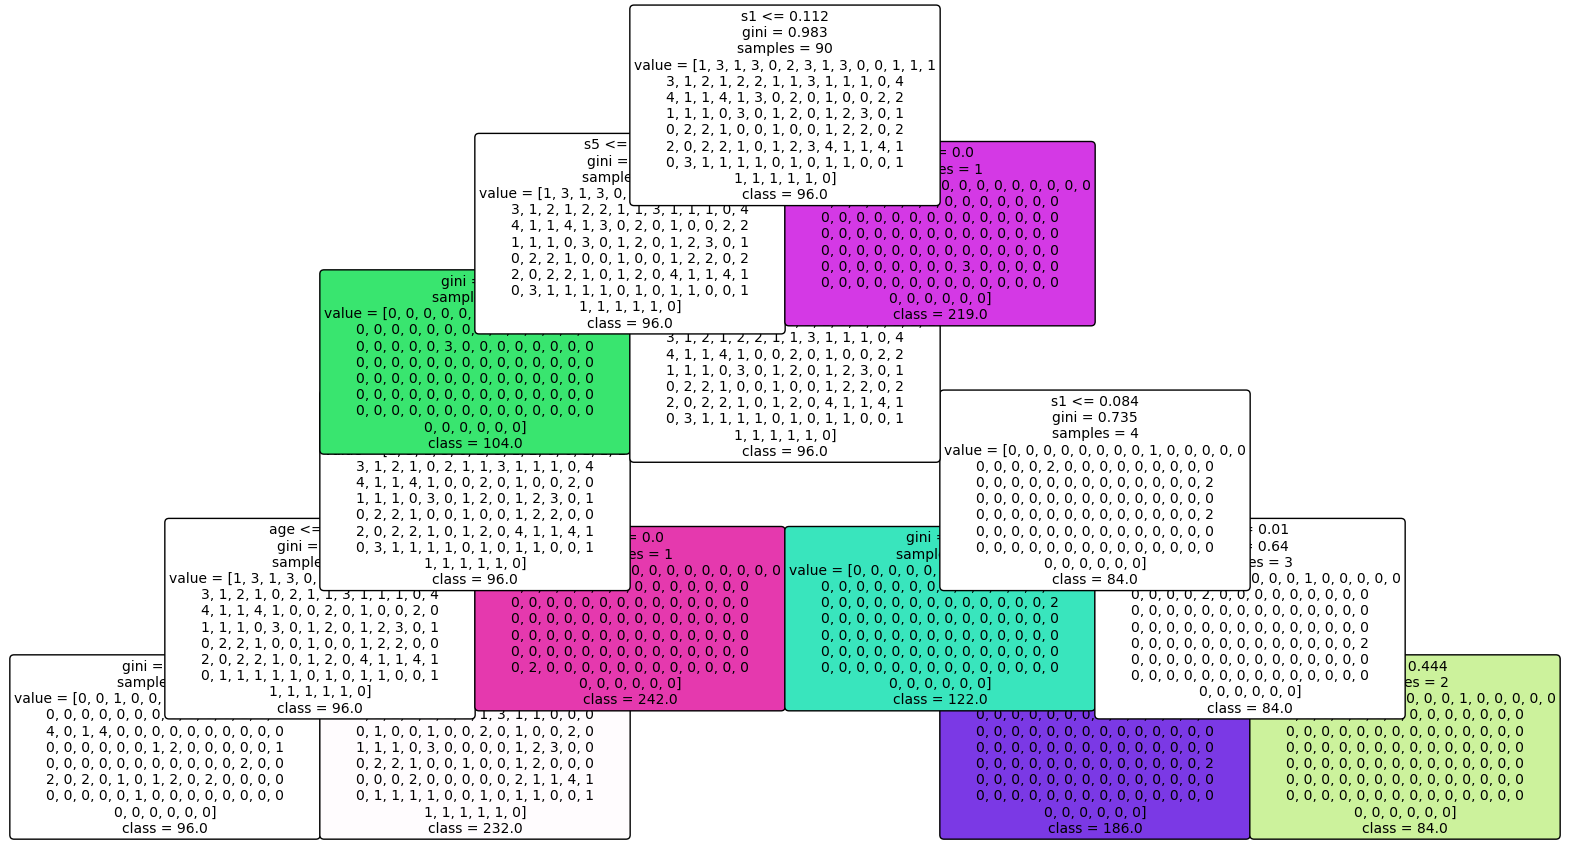

In [16]:
#Step 5: Plot the tree
from sklearn import tree
class_names = [str(c) for c in classifier_rf.classes_]
plt.figure(figsize=(20,10))
tree.plot_tree(classifier_rf.estimators_[0], 
          feature_names=diabetes.feature_names, 
          class_names=class_names, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


In [17]:
y_pred = classifier_rf.predict(x_test)  # Only predict on test set
y_pred.shape

(133,)

In [18]:
y_pred

array([219.,  70., 202., 230., 222.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  72.,
       128., 232., 129.,  63.,  52.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 197., 233.,  68., 190.,  96.,  72.,  72.,  98.,  37.,  63.,
       184., 144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,
        72., 178.,  88., 270., 101., 197.,  97.,  52.,  71., 262.,  52.,
       102., 166., 189., 173., 220., 206.,  97.,  60.,  61., 242.,  52.,
       128., 104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93.,
       232.])

In [19]:
#Step 6: Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9398496240601504

In [20]:
# Step 7:Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
